In [1]:
import cv2 
import imutils 
from google.colab.patches import cv2_imshow
from google.colab import files 
import numpy as np
from PIL import Image

In [3]:
uploaded = files.upload()

Saving 4SHUTDKWUJBQXALP7LBBUUGSXM.jpg to 4SHUTDKWUJBQXALP7LBBUUGSXM.jpg


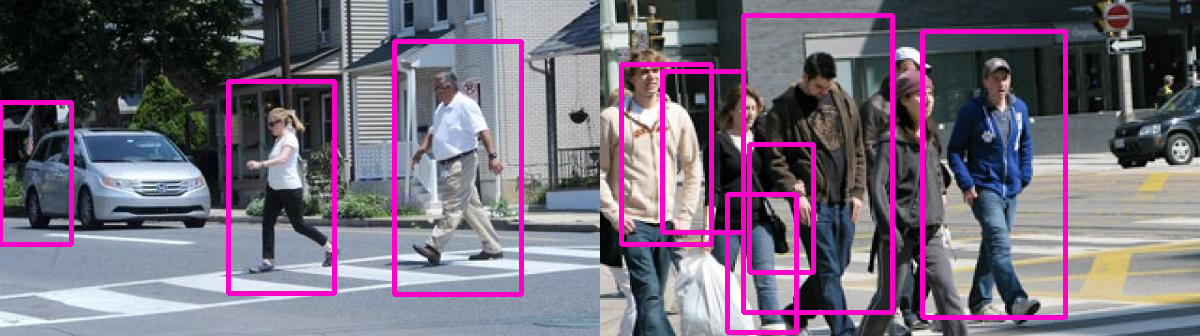

In [22]:
def fun(path1, path2):
  im = imutils.resize(cv2.imread(path1), width=600, height=600)
  cv2.imwrite(path1, im)

  im = imutils.resize(cv2.imread(path2), width=600, height=600)
  cv2.imwrite(path2, im)

  im1 = Image.open(path1)
  im2 = Image.open(path2)

  w1, h1 = im1.size
  w2, h2 = im2.size

  final = Image.new('RGB', (w1 + w2, h1))
  final.paste(im=im1, box=(0, 0))
  final.paste(im=im2, box=(w1, 0))

  final.save("final.jpg")

  final = cv2.imread('final.jpg')

  hog = cv2.HOGDescriptor() 
  hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector()) 
      
  cordinates, _ = hog.detectMultiScale(final, winStride=(2, 2)) 
  for (x, y, w, h) in cordinates: 
      cv2.rectangle(final, (x, y), (x + w, y + h), (200, 0, 255), 4) 

  cv2_imshow(final)

fun('4SHUTDKWUJBQXALP7LBBUUGSXM.jpg', 'people_photo.jpg')